In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from scipy.optimize import curve_fit
from scipy.stats import chi2
from scipy.stats import norm
import scipy.constants as scp
from scipy.integrate import quad
from tabulate import tabulate
from scipy import signal
import scipy.constants as const

In [2]:
def sigma(x, y, dx, dy, label):
    s = np.abs(x-y)/np.sqrt(dx**2 + dy**2)
    print('Sigmaabweichung {} ='.format(str(label)), s)
    return s

---

# A2

In [3]:
#Messwerte:

# 0 degrees:
p0 = 912 #mbar
U0 = 100.3 #mV
T0 = 0.5 #°C

# 0 bis 100 grad:
p = np.array([947,986,1034,1066,1111,1136,1180,1209,1223,1238])
U = np.array([104.1,107.8,113.6,117.2,122.5,125.4,130.5,134.3,136.1,138.6])
T = np.array([10, 16.3,30,38.9,51.6,60,70.6,75.1,81.1,90.1])
T_ = np.array([10,20,35,45,55,65,75,85,90,96])

p_room = 1006.8

# dry ice:
p_di = 764
U_di = 83.5

# lq nitrogen
p_ln = 251
U_ln = 20.8

In [4]:
#Fehler
dp0 = 2
dU0 = 0.0008 * U0 + 0.5
dT0 = 0.015 * T0 + 2

dp = np.full(10, 2)
dU = 0.0008 * U + 0.5
dT = 0.015 * T + 2
dT_ = 0.015 * T_ + 2

dp_di = 2
dp_ln = 2

dU_di = 0.0008 * U_di + 0.5
dU_ln = 0.0008 * U_ln + 0.5

Drucknullpunkt = (-273.110175760458 +/- -2.3967293785946846)°C
T flüssiger Stickstoff = (-197.94498484392844 +/- 1.7967774721082606)°C
Sigmaabweichung T lq Nitrogen = 1.1937954906634012
T Trockeneis = (-44.32051097867082 +/- 1.7967774721082748)°C


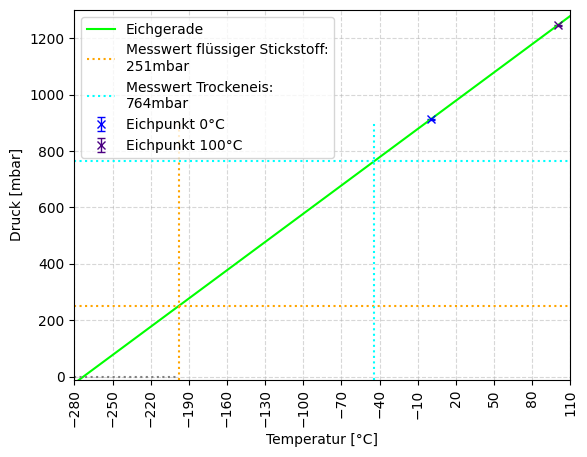

In [5]:
X = np.linspace(-280, 110, 100)

plt.figure()
plt.grid(alpha=0.5, linestyle='--')
plt.axis([-280, 110, -10, 1300])
plt.xticks([-280, -250, -220, -190, -160, -130, -100, -70, -40, -10, 20, 50, 80, 110], rotation=90)
plt.xlabel('Temperatur [°C]')
plt.ylabel('Druck [mbar]')

#Eichpunkt 0°C
plt.errorbar(0, p0, yerr=dp0, fmt='x', color='blue', label='Eichpunkt 0°C', capsize=3, lw=1)


#Eichpunkt 100°C
p_NB = p[-1] * (1013.25/p_room)
dp_NB = dp[-1] * (1013.25/p_room)

plt.errorbar(100, p_NB, yerr=dp_NB, fmt='x', color='indigo', label='Eichpunkt 100°C', capsize=3, lw=1)

#Eichgerade:
def linear(x,a,b):
    return a * x + b

p_pop, p_cov = curve_fit(linear, [0,100], [p0, p_NB], sigma=[dp0, dp_NB], absolute_sigma=True)

plt.plot(X, linear(X, *p_pop), color='lime', label='Eichgerade')

#Nullpunkt:
T_p0 = -p_pop[1]/p_pop[0]
dT_p0 = T_p0 * np.sqrt((np.sqrt(p_cov[0][0])/p_pop[0])**2 + (np.sqrt(p_cov[1][1])/p_pop[1])**2)

print('Drucknullpunkt = ({} +/- {})°C'.format(T_p0, dT_p0))

plt.hlines(0, -280, -200, ls=':', color='grey')

#flüssig stickstoff:
plt.hlines(p_ln, -280, 110, ls=':', color='orange', 
        label="\n".join([r"Messwert flüssiger Stickstoff:", 
                          r'{}mbar'.format(p_ln)]))

T_ln = (p_ln - p_pop[1])/p_pop[0]
dT_ln = - T_ln + (p_ln + 3* dp_ln - p_pop[1])/p_pop[0]

print('T flüssiger Stickstoff = ({} +/- {})°C'.format(T_ln, dT_ln))

plt.vlines(T_ln, -10, 900, ls=':', color='orange')

_ = sigma(T_ln, -195.8, dT_ln, 0, 'T lq Nitrogen')

#Trockeneis:
plt.hlines(p_di, -280, 110, ls=':', color='cyan', 
        label="\n".join([r"Messwert Trockeneis:", 
                          r'{}mbar'.format(p_di)]))

T_di = (p_di - p_pop[1])/p_pop[0]
dT_di = - T_di + (p_di + 3* dp_di - p_pop[1])/p_pop[0]

print('T Trockeneis = ({} +/- {})°C'.format(T_di, dT_di))

plt.vlines(T_di, -10, 900, ls=':', color='cyan')

#Kelvin-Skala
def CtoK(x):
    return x + 273.15

def KtoC(x):
    return x - 273.15


_ = plt.legend(loc='upper left')

Drucknullpunkt = (-270.54145860145553 +/- -0.8368201455403369)°C


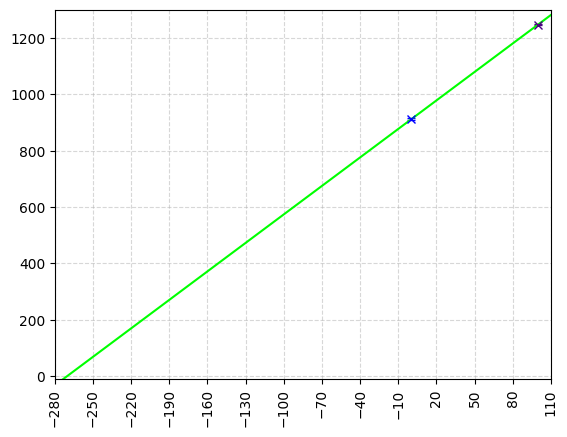

In [6]:
X = np.linspace(-280, 110, 100)

plt.figure()
plt.grid(alpha=0.5, linestyle='--')
plt.axis([-280, 110, -10, 1300])
plt.xticks([-280, -250, -220, -190, -160, -130, -100, -70, -40, -10, 20, 50, 80, 110], rotation=90)

#Eichpunkt 0°C
plt.errorbar(0, p0, yerr=dp0, fmt='x', color='blue', label='Eichpunkt 0°C', capsize=3, lw=1)


#Eichpunkt 100°C
p_NB = p[-1] * (1013.25/p_room)
dp_NB = dp[-1] * (1013.25/p_room)

plt.errorbar(100, p_NB, yerr=dp_NB, fmt='x', color='indigo', label='Eichpunkt 100°C', capsize=3, lw=1)

#Eichgerade:
def linear(x,a,b):
    return a * x + b

p_pop, p_cov = curve_fit(linear, [0,100, -195.8], [p0, p_NB, p_ln], sigma=[dp0, dp_NB, dp_ln], absolute_sigma=True)

plt.plot(X, linear(X, *p_pop), color='lime', label='Eichgerade')

#Nullpunkt:
T_p0 = -p_pop[1]/p_pop[0]
dT_p0 = T_p0 * np.sqrt((np.sqrt(p_cov[0][0])/p_pop[0])**2 + (np.sqrt(p_cov[1][1])/p_pop[1])**2)

print('Drucknullpunkt = ({} +/- {})°C'.format(T_p0, dT_p0))

Drucknullpunkt = (-273.110175760458 +/- -2.3967293785946846)°C
Sigmaabweichung Drucknullpunkt = 0.016616076849417388
----
T flüssiger Stickstoff = (-197.94498484392844 +/- 1.7967774721082606)°C
Sigmaabweichung T lq Nitrogen = 1.1937954906634012
----
T Trockeneis = (-44.32051097867082 +/- 1.7967774721082748)°C


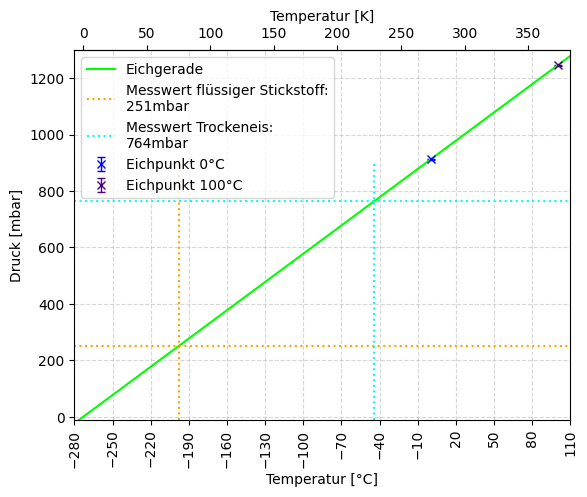

In [7]:
X = np.linspace(-280, 110, 100)

fig, ax = plt.subplots()
plt.grid(alpha=0.5, linestyle='--')
plt.axis([-280, 110, -10, 1300])
ax.set_xticks([-280, -250, -220, -190, -160, -130, -100, -70, -40, -10, 20, 50, 80, 110]) #, rotation=90
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Temperatur [°C]')
ax.set_ylabel('Druck [mbar]')

#Eichpunkt 0°C
ax.errorbar(0, p0, yerr=dp0, fmt='x', color='blue', label='Eichpunkt 0°C', capsize=3, lw=1)


#Eichpunkt 100°C
p_NB = p[-1] * (1013.25/p_room)
dp_NB = dp[-1] * (1013.25/p_room)

ax.errorbar(100, p_NB, yerr=dp_NB, fmt='x', color='indigo', label='Eichpunkt 100°C', capsize=3, lw=1)

#Eichgerade:
def linear(x,a,b):
    return a * x + b

p_pop, p_cov = curve_fit(linear, [0,100], [p0, p_NB], sigma=[dp0, dp_NB], absolute_sigma=True)

ax.plot(X, linear(X, *p_pop), color='lime', label='Eichgerade')

#Nullpunkt:
T_p0 = -p_pop[1]/p_pop[0]
dT_p0 = T_p0 * np.sqrt((np.sqrt(p_cov[0][0])/p_pop[0])**2 + (np.sqrt(p_cov[1][1])/p_pop[1])**2)

print('Drucknullpunkt = ({} +/- {})°C'.format(T_p0, dT_p0))
_ = sigma(T_p0, -273.15, dT_p0, 0, 'Drucknullpunkt')

print('----')

#ax.hlines(0, -280, -200, ls=':', color='grey')

#flüssig stickstoff:
ax.hlines(p_ln, -280, 110, ls=':', color='orange', 
        label="\n".join([r"Messwert flüssiger Stickstoff:", 
                          r'{}mbar'.format(p_ln)]))

T_ln = (p_ln - p_pop[1])/p_pop[0]
dT_ln = - T_ln + (p_ln + 3* dp_ln - p_pop[1])/p_pop[0]

print('T flüssiger Stickstoff = ({} +/- {})°C'.format(T_ln, dT_ln))

ax.vlines(T_ln, -10, 900, ls=':', color='orange')

_ = sigma(T_ln, -195.8, dT_ln, 0, 'T lq Nitrogen')

print('----')

#Trockeneis:
ax.hlines(p_di, -280, 110, ls=':', color='cyan', 
        label="\n".join([r"Messwert Trockeneis:", 
                          r'{}mbar'.format(p_di)]))

T_di = (p_di - p_pop[1])/p_pop[0]
dT_di = - T_di + (p_di + 3* dp_di - p_pop[1])/p_pop[0]

print('T Trockeneis = ({} +/- {})°C'.format(T_di, dT_di))

ax.vlines(T_di, -10, 900, ls=':', color='cyan')

#Kelvin-Skala
def CtoK(x):
    return x + 273.15

def KtoC(x):
    return x - 273.15

secax = ax.secondary_xaxis('top', functions=(CtoK, KtoC))
secax.set_xlabel('Temperatur [K]')

_ = plt.legend(loc='upper left')

In [8]:
Temp_gas = (p - p_pop[1])/p_pop[0]
dTemp_gas = - Temp_gas + (p + 3*dp - p_pop[1])/p_pop[0]

print(Temp_gas, dTemp_gas)

[10.48120192 22.16025549 36.53447527 46.11728845 59.59311949 67.07969229
 80.25606042 88.94048487 93.13296564 97.62490932] [1.79677747 1.79677747 1.79677747 1.79677747 1.79677747 1.79677747
 1.79677747 1.79677747 1.79677747 1.79677747]


C:\Users\matth\AppData\Local\Temp\ipykernel_10816\1863126937.py:24: OptimizeWarning: Covariance of the parameters could not be estimated
  p_pop_err, _ = curve_fit(linear, [T_[0], T_[-1]], [R[0]-dR[0], R[-1]+dR[-1]])


Steigung = 0.4053808433832583 +/- 0.006669227593702126
Sigmaabweichung Steigung = 2.1817883973548784


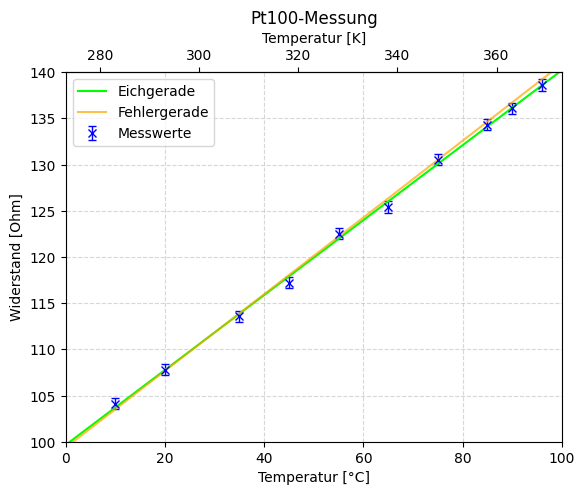

In [17]:
X = np.linspace(0, 100, 100)

fig, ax = plt.subplots()
plt.grid(alpha=0.5, linestyle='--')
plt.title('Pt100-Messung')
plt.axis([0, 100, 100, 140])
#ax.set_xticks([-280, -250, -220, -190, -160, -130, -100, -70, -40, -10, 20, 50, 80, 110]) #, rotation=90
#ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Temperatur [°C]')
ax.set_ylabel('Widerstand [Ohm]')

#Widerstände:

R = U /1 #Ohm
dR = dU

ax.errorbar(T_, R, yerr=dR, fmt='x', color='blue', label='Messwerte', capsize=3, lw=1)

#Eichgerade:
def linear(x,a,b):
    return a * x + b

p_pop, p_cov = curve_fit(linear, T_, R, sigma=dR, absolute_sigma=True)
p_pop_err, _ = curve_fit(linear, [T_[0], T_[-1]], [R[0]-dR[0], R[-1]+dR[-1]])

ax.plot(X, linear(X, *p_pop), color='lime', label='Eichgerade')

ax.plot(X, linear(X, *p_pop_err), color='orange', label='Fehlergerade', alpha=0.7)

a = p_pop[0]
da = np.sqrt(p_cov[0][0])

print('Steigung = {} +/- {}'.format(a,da))

_ = sigma(a, 100*3.9083e-3, da, 0, 'Steigung')

#Kelvin-Skala
def CtoK(x):
    return x + 273.15

def KtoC(x):
    return x - 273.15

secax = ax.secondary_xaxis('top', functions=(CtoK, KtoC))
secax.set_xlabel('Temperatur [K]')

_ = plt.legend(loc='upper left')

C:\Users\matth\AppData\Local\Temp\ipykernel_10816\708832535.py:19: OptimizeWarning: Covariance of the parameters could not be estimated
  p_pop_err, p_cov_err = curve_fit(linear, [T_[0], T_[-1]], [T[0]-dT[0], T[-1]+dT[-1]])


Steigung = 0.9261826082918898 +/- 0.029746945953655783
Sigmaabweichung Steigung = 2.4815116087249396


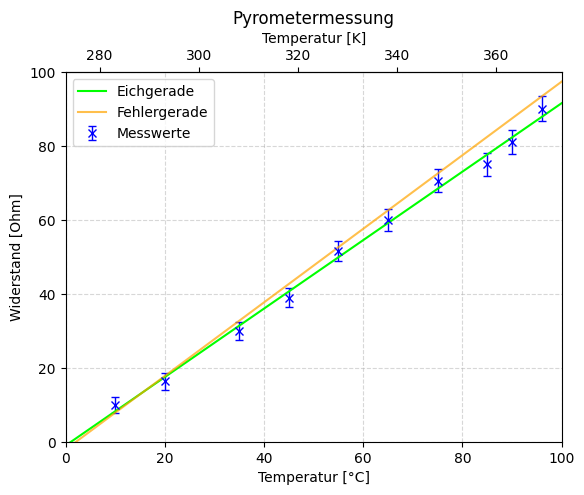

In [14]:
X = np.linspace(0, 100, 100)

fig, ax = plt.subplots()
plt.grid(alpha=0.5, linestyle='--')
plt.title('Pyrometermessung')
plt.axis([0, 100, 0, 100])
#ax.set_xticks([-280, -250, -220, -190, -160, -130, -100, -70, -40, -10, 20, 50, 80, 110]) #, rotation=90
#ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Temperatur [°C]')
ax.set_ylabel('Widerstand [Ohm]')

ax.errorbar(T_, T, yerr=dT, fmt='x', color='blue', label='Messwerte', capsize=3, lw=1)

#Eichgerade:
def linear(x,a,b):
    return a * x + b

p_pop, p_cov = curve_fit(linear, T_, T, sigma=dT, absolute_sigma=True)
p_pop_err, _ = curve_fit(linear, [T_[0], T_[-1]], [T[0]-dT[0], T[-1]+dT[-1]])

ax.plot(X, linear(X, *p_pop), color='lime', label='Eichgerade')

ax.plot(X, linear(X, *p_pop_err), color='orange', label='Fehlergerade', alpha=0.7)

a = p_pop[0]
da = np.sqrt(p_cov[0][0])

print('Steigung = {} +/- {}'.format(a,da))

_ = sigma(a, 1, da, 0, 'Steigung')


#Kelvin-Skala
def CtoK(x):
    return x + 273.15

def KtoC(x):
    return x - 273.15

secax = ax.secondary_xaxis('top', functions=(CtoK, KtoC))
secax.set_xlabel('Temperatur [K]')

_ = plt.legend(loc='upper left')